<a href="https://colab.research.google.com/github/IraniS12/DATAMINING/blob/main/UasDatming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Load Dataset
# Gantilah path ini jika dataset kamu diupload di Google Colab
df = pd.read_csv("/content/drive/MyDrive/Dataset_datming/student_sleep_expanded.csv")

In [ ]:
# 3. Perbaikan Dataset
# Hitung durasi tidur weekday & weekend
def hitung_durasi_tidur(start, end):
    durasi = end - start
    return durasi if durasi >= 0 else durasi + 24  # jika tidur melewati tengah malam

df["Weekday_Sleep_Duration"] = df.apply(
    lambda row: hitung_durasi_tidur(row["Weekday_Sleep_Start"], row["Weekday_Sleep_End"]), axis=1)

df["Weekend_Sleep_Duration"] = df.apply(
    lambda row: hitung_durasi_tidur(row["Weekend_Sleep_Start"], row["Weekend_Sleep_End"]), axis=1)

# Hapus kolom jam tidur asli yang sudah dikonversi
df.drop(columns=[
    "Weekday_Sleep_Start", "Weekday_Sleep_End",
    "Weekend_Sleep_Start", "Weekend_Sleep_End"
], inplace=True)

# (Opsional) Jika kolom Gender adalah kategorikal, bisa dikodekan sebagai dummy
# df = pd.get_dummies(df, columns=["Gender"], prefix="Gender")

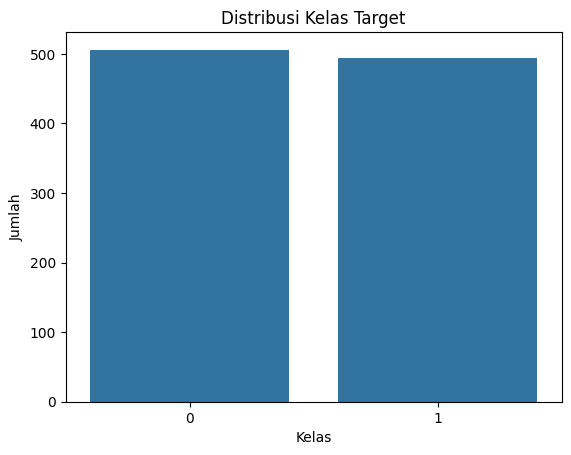

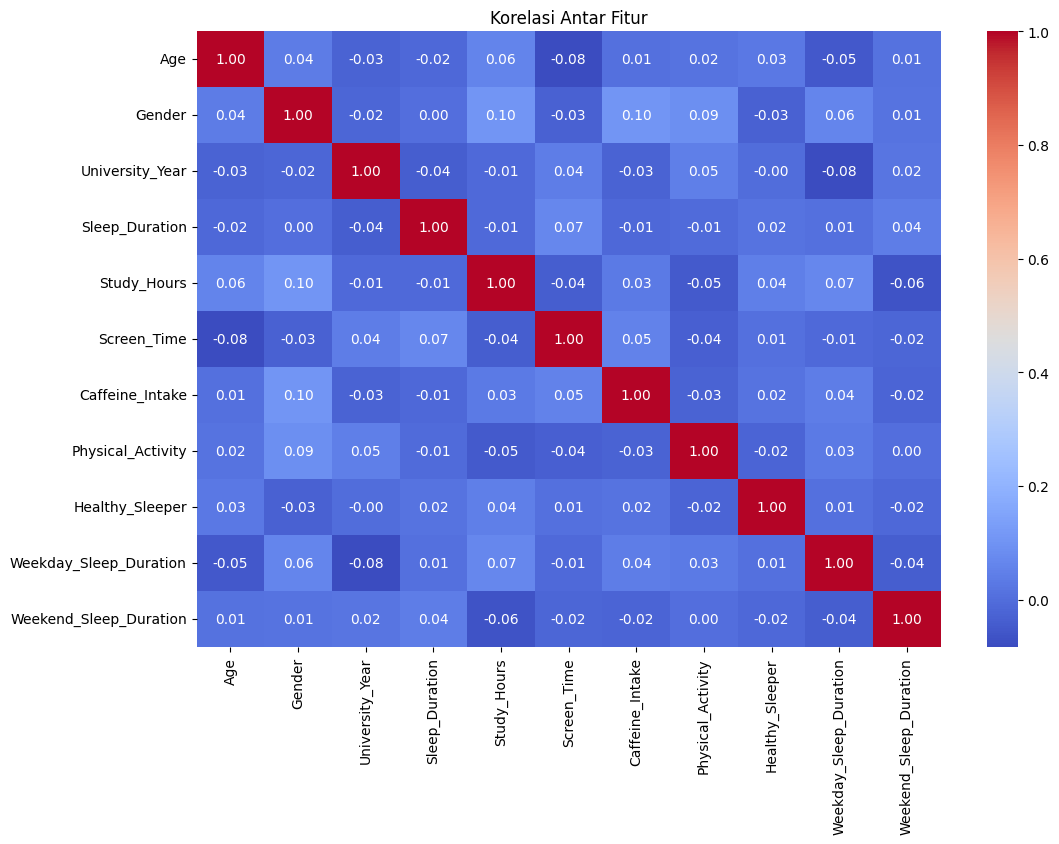

In [ ]:
# Countplot kelas target
sns.countplot(x=df["Healthy_Sleeper"])
plt.title("Distribusi Kelas Target")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()

In [ ]:
# 4. Preprocessing
X = df.drop(columns=["Healthy_Sleeper"])
y = df["Healthy_Sleeper"]

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# 6. Model Training
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [ ]:
# 7. Evaluasi
def evaluasi_model(nama, y_true, y_pred):
    print(f"\n Evaluasi Model: {nama}")
    print("Akurasi :", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluasi_model("Decision Tree", y_test, dt_pred)
evaluasi_model("K-Nearest Neighbors", y_test, knn_pred)


 Evaluasi Model: Decision Tree
Akurasi : 0.94
Confusion Matrix:
 [[110   2]
 [ 10  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       112
           1       0.97      0.89      0.93        88

    accuracy                           0.94       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200


 Evaluasi Model: K-Nearest Neighbors
Akurasi : 0.69
Confusion Matrix:
 [[77 35]
 [27 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       112
           1       0.64      0.69      0.66        88

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



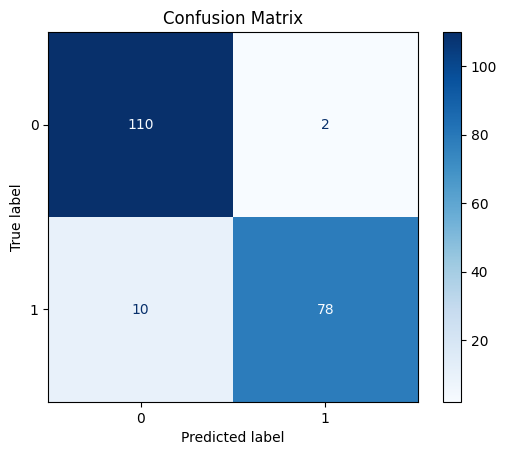

In [ ]:
y_pred = dt_pred  # atau knn_pred jika model terbaik adalah KNN
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

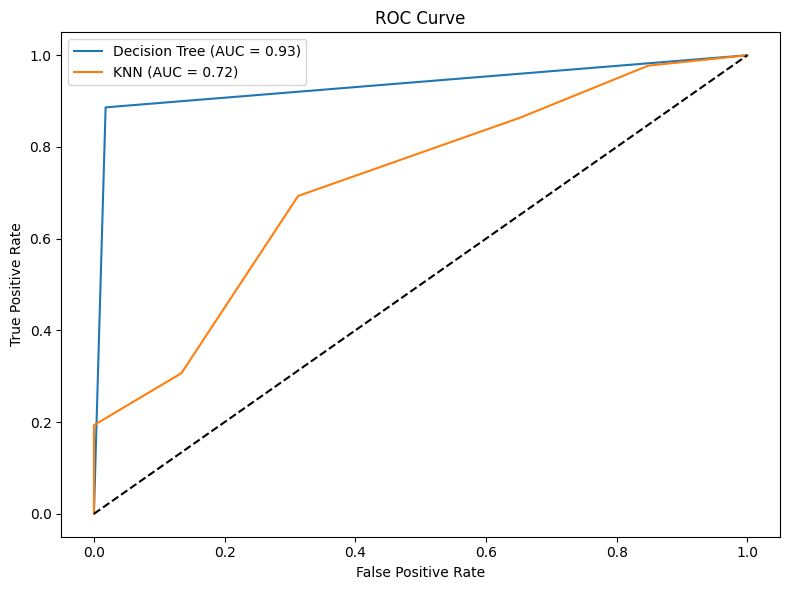

In [ ]:
# === 9. ROC Curve dan Precision-Recall Curve ===
y_score_dt = dt_model.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_score_knn = knn_model.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

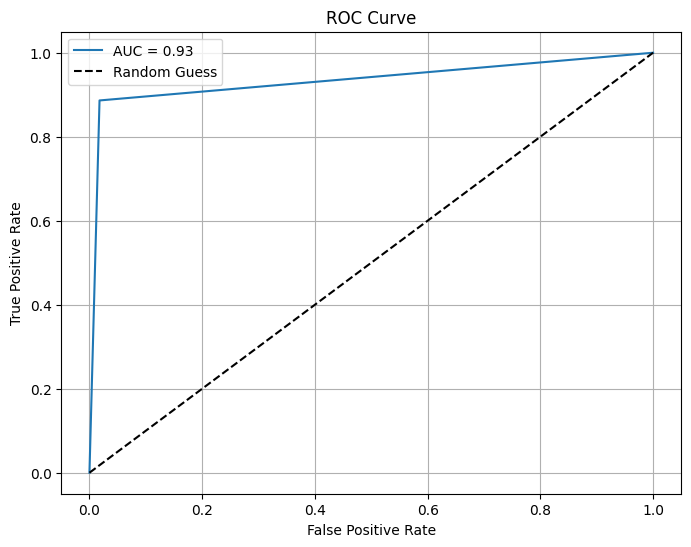

In [ ]:
y_proba = dt_model.predict_proba(X_test)[:,1]  # ganti ke knn_model bila perlu
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

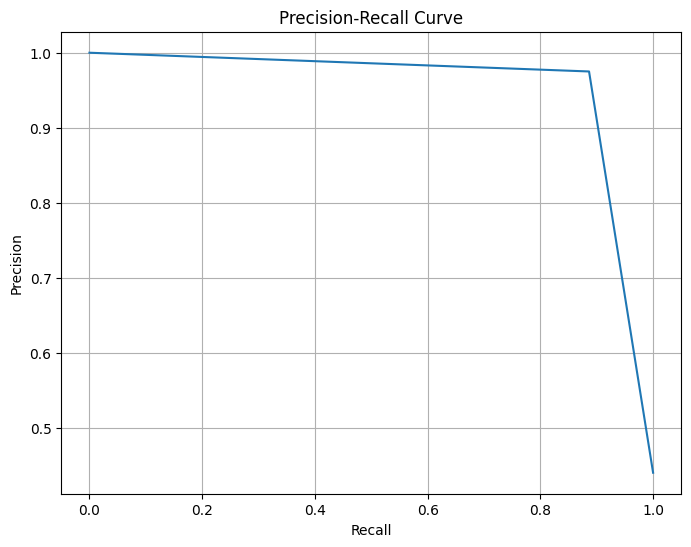

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

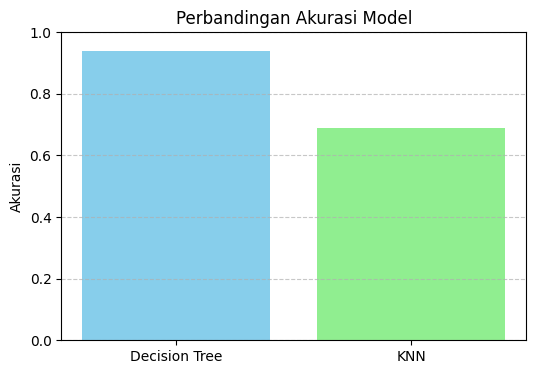

In [ ]:
# 8. Visualisasi Perbandingan Akurasi
acc_dt = accuracy_score(y_test, dt_pred)
acc_knn = accuracy_score(y_test, knn_pred)

plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'KNN'], [acc_dt, acc_knn], color=['skyblue', 'lightgreen'])
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 9. Menentukan Model Terbaik
best_model = "Decision Tree" if acc_dt > acc_knn else "KNN"
best_acc = max(acc_dt, acc_knn)
print(f"\n Model terbaik adalah: {best_model} dengan akurasi {best_acc*100:.2f}%")


 Model terbaik adalah: Decision Tree dengan akurasi 94.00%
